Aygaz Makine Öğrenmesi Bootcamp: Yeni Nesil Proje Kampı

Bu proje, Kaggle'dan indirilen Online Payments Fraud Detection Dataset üzerinde gözetimli ve gözetimsiz öğrenme yöntemlerini kullanarak gerçekleştirilmiştir. Bu dosyada, veriyi işleme, model eğitimi ve model değerlendirme süreçlerini detaylandırdım.

In [8]:
# 1.Kütüphanelerin yüklenmesi
#Projenin başlangıcında gerekli kütüphaneler içe aktardım:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, mean_squared_error



#pandas: Veri manipülasyonu ve analizi için.

#matplotlib.pyplot: Statik, etkileşimli ve animasyonlu görselleştirmeler oluşturmak için.

#seaborn: İstatistiksel grafikler çizmek için.

#sklearn: Python için bir makine öğrenimi kütüphanesidir.

In [9]:
# 2. Verilerin Yüklenmesi ve İncelenmesi
#Veri setini Kaggle'dan indirip yükledim ve ilk aşamada veriyi inceledim.

df = pd.read_csv(r"C:\Users\USER\Downloads\archive\PS_20174392719_1491204439457_log.csv")

#CSV dosyasını bir DataFrame'e okuttum.

In [8]:
df.head()
#İlk 5 satırı görüntüledim.

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [9]:
df.info()
#Veri setinin yapısını inceledim.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [10]:
df.describe()
#Veri setinin istatistiksel özetini görüntüledim.

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [11]:
df.isnull().sum()
#Her sütundaki eksik değerleri kontrol ettim.

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

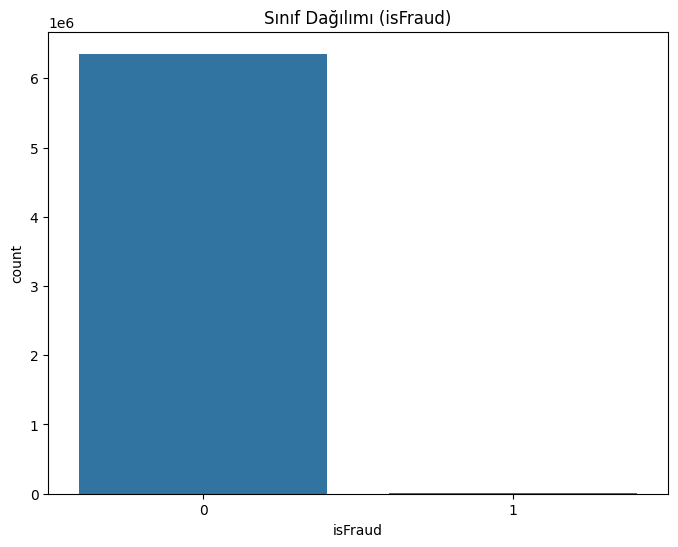

In [12]:
# 3.Keşifsel Veri Analizi (EDA)
# Veri setimizde "isFraud" kolonundaki 1'ler dolandırıcılık (fraud) olaylarını, 0'lar ise dolandırıcılık olmayan olayları temsil etmekte.
# Bu görselleştirme ile dolandırıcılık işlemlerinin toplam işlemler içindeki oranını görebiliriz.

plt.figure(figsize=(8,6))  # Grafik boyutlarını ayarladım.
sns.countplot(x='isFraud', data=df)  # 'isFraud' değişkeninin sınıf dağılımını çubuk grafiği ile gösterdim.
plt.title('Sınıf Dağılımı (isFraud)')  # Grafiğe başlık ekledim.
plt.show()  # Grafiği ekranda gösterdim.

#  Dolandırıcılık işlemlerinin toplam içindeki oranını görerek veri setinde sınıf dengesizliği olup olmadığını inceledim.


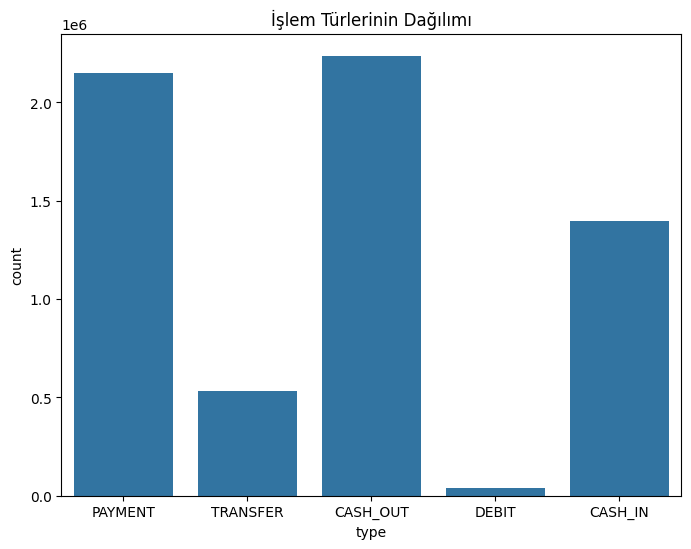

In [13]:
# İşlem türlerinin (transaction types) dağılımını inceledim.
# 'type' sütunu çeşitli işlem türlerini içermektedir. Bu grafik, hangi işlem türlerinin daha sık yapıldığını gösterecek.

plt.figure(figsize=(8,6))  # Grafik boyutlarını ayarladım.
sns.countplot(x='type', data=df)  # 'type' sütunundaki işlem türlerinin dağılımını gösterdim.
plt.title('İşlem Türlerinin Dağılımı')  # Grafiğe başlık ekledim.
plt.show()  # Grafiği ekranda gösterdim.

#  Bu analiz, hangi tür işlemlerin daha yaygın olduğunu ve dolandırıcılık işlemlerinin hangi işlem türlerinde yoğunlaştığını anlamamıza yardımcı olmakta.


In [26]:
# İşlem türüne göre dolandırıcılık oranını inceledim.
# Burada farklı işlem türleri arasında dolandırıcılık (fraud) oranlarını kıyasladım.
# Hangi işlem türlerinde dolandırıcılık oranının daha yüksek olduğunu görebiliriz.

plt.figure(figsize=(10,6))  # Grafik boyutlarını ayarladım.
sns.barplot(x='type', y='isFraud', data=df, estimator=sum)  # 'type' bazında 'isFraud' değişkenini inceledim.
plt.title('İşlem Türüne Göre Dolandırıcılık Oranı')  # Grafiğe başlık ekledim.
plt.show()  # Grafiği ekranda gösterdim.

#  Bu analiz, dolandırıcılık işlemlerinin hangi işlem türlerinde daha sık gerçekleştiğini belirlememizi sağladı.


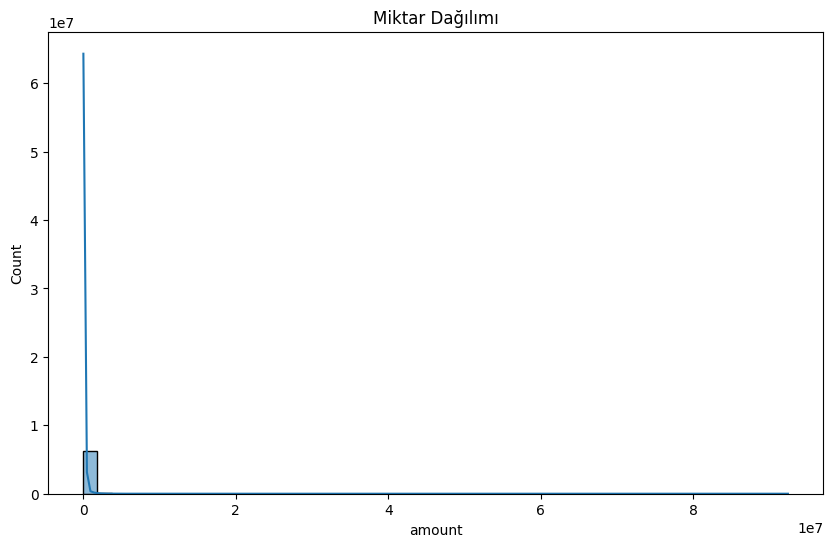

In [15]:
# Miktar dağılımını inceledim.
# İşlem tutarlarının dağılımını histogram grafiği ile görselleştirdim. 
# Bu analiz, işlem miktarlarının çoğunlukla hangi aralıklarda olduğunu ve uç değerleri (outliers) anlamama yardımcı oldu.

plt.figure(figsize=(10,6))  # Grafik boyutlarını ayarladım.
sns.histplot(df['amount'], bins=50, kde=True)  # İşlem tutarlarının dağılımını histogram ile gösterdim. KDE eğrisi ile yoğunluk analizi yaptım.
plt.title('Miktar Dağılımı')  # Grafiğe başlık ekledim.
plt.show()  # Grafiği ekranda gösterdim.



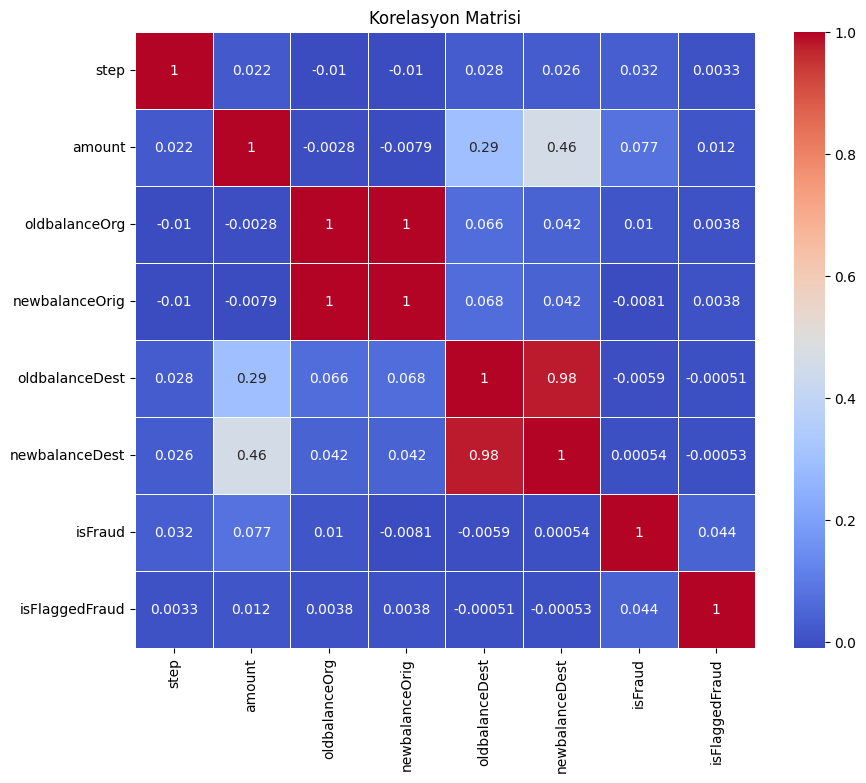

In [17]:
# Sayısal sütunları seçtim
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns  # Sayısal veri tiplerini seçtim.

# Veri setinin sayısal sütunları arasındaki korelasyonu hesapladım.
corr_matrix = df[numeric_columns].corr()

# Korelasyon matrisini bir ısı haritası (heatmap) ile görselleştirdim.
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)

# Grafiği gösterdim.
plt.title("Korelasyon Matrisi")
plt.show()

In [10]:
# 4.Veri Ön İşleme (Data Preprocessing)
#4.1 Kategorik Verilerin Kodlanması

from sklearn.preprocessing import LabelEncoder

# Kategorik sütunları belirledim.
categorical_columns = ['type', 'nameOrig', 'nameDest']

# Her bir kategorik sütun için Label Encoding uygulamak üzere boş bir sözlük oluşturdum.
label_encoders = {}

# Kategorik sütunları dönüştürmek için döngü başlatıyorum.
for column in categorical_columns:
    le = LabelEncoder()  # LabelEncoder nesnesi oluşturdum.
    df[column] = le.fit_transform(df[column])  # Kategorik verileri sayısal verilere dönüştürdüm.
    label_encoders[column] = le  

# 4.2. Özellik Ölçekleme (Feature Scaling)
# Özellikler arasındaki farklılıkları azaltmak için StandardScaler kullandım.

from sklearn.preprocessing import StandardScaler

# Özelliklerin seçilmesi (sayılar arasında ölçek farkı olan sütunlar)
features = df[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']]

# StandardScaler nesnesi oluşturdum.
scaler = StandardScaler()

# Özellikleri ölçeklendirdim.
scaled_features = scaler.fit_transform(features)  # Özellikleri standardize ettim (ortalama 0 ve standart sapma 1)

# Ölçeklendirilmiş özellikleri bir DataFrame'e dönüştürdüm.
scaled_features_df = pd.DataFrame(scaled_features, columns=features.columns)  # Sonuçları DataFrame formatında sakladım.

# 4.3. Veriyi Eğitim ve Test Setlerine Ayırma
# Modeli değerlendirmek için veriyi eğittim ve test setlerine ayırdım.

from sklearn.model_selection import train_test_split

# Özellikleri ve hedef değişkeni ayırdım.
X = scaled_features_df  # Özellikler (giriş verileri)
y = df['isFraud']  # Hedef değişken (çıkış verileri)

# Eğitim ve test setlerine ayırdım.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Eğitim ve test setlerine böldüm. (test seti %20)

# 4.4. Eksik Veri Kontrolü ve Temizleme

# Eksik verileri kontrol ettim.
missing_values = df.isnull().sum()

# Eksik verileri temizleme 
df = df.dropna()  # Eksik veri içeren satırları kaldırdım.


In [11]:
#5. Model Eğitimi ve Hiperparametre Optimizasyonu
#5.1. Lojistik Regresyon(Gözetimli Öğrenme)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Lojistik Regresyon modelini oluşturdum.
log_reg_model = LogisticRegression()

# Modeli eğitim verisi üzerinde eğittim.
log_reg_model.fit(X_train, y_train)

# Test verisinde tahminler yaptırdım.
y_pred = log_reg_model.predict(X_test)

# Modelin doğruluğunu hesaplattım.
accuracy = accuracy_score(y_test, y_pred)
print(f"Lojistik Regresyon Doğruluk Skoru: {accuracy}")

# Karışıklık Matrisi ve Sınıflandırma Raporu
print("Karışıklık Matrisi:\n", confusion_matrix(y_test, y_pred))
print("Sınıflandırma Raporu:\n", classification_report(y_test, y_pred))


Lojistik Regresyon Doğruluk Skoru: 0.999170153175893
Karışıklık Matrisi:
 [[1270849      55]
 [   1001     619]]
Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.92      0.38      0.54      1620

    accuracy                           1.00   1272524
   macro avg       0.96      0.69      0.77   1272524
weighted avg       1.00      1.00      1.00   1272524



In [13]:
#5.2.  Lojistik Regresyon İçin Hiperparametre Optimizasyonu
#Lojistik regresyon modeli için GridSearchCV kullanarak en iyi hiperparametreleri buldum.

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Lojistik Regresyon için hiperparametreler
param_grid = {
    'C': [0.1, 1],  
    'penalty': ['l2'],  
    'solver': ['liblinear']  
}

# Lojistik Regresyon modelini oluşturdum.
log_reg = LogisticRegression()

# GridSearchCV kullanarak en iyi hiperparametreleri buldum.
grid_search_log_reg = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')

# Modeli eğitim verisi üzerinde eğittim.
grid_search_log_reg.fit(X_train, y_train)

# En iyi hiperparametreleri gösterdim.
print("En İyi Hiperparametreler:", grid_search_log_reg.best_params_)

# En iyi modeli test setinde değerlendirdim.
best_log_reg_model = grid_search_log_reg.best_estimator_
y_pred_log_reg = best_log_reg_model.predict(X_test)

# Modelin performansını gösterdim.
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print(f"Lojistik Regresyon Doğruluk Skoru: {accuracy_log_reg}")
print("Karışıklık Matrisi:\n", confusion_matrix(y_test, y_pred_log_reg))
print("Sınıflandırma Raporu:\n", classification_report(y_test, y_pred_log_reg))


En İyi Hiperparametreler: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Lojistik Regresyon Doğruluk Skoru: 0.9991693673360974
Karışıklık Matrisi:
 [[1270824      80]
 [    977     643]]
Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.89      0.40      0.55      1620

    accuracy                           1.00   1272524
   macro avg       0.94      0.70      0.77   1272524
weighted avg       1.00      1.00      1.00   1272524



In [14]:
# 5.3. k-Ortalama Kümeleme(Gözetimsiz Öğrenme)

from sklearn.cluster import KMeans

# KMeans modeli oluşturma (örnek olarak 5 küme oluşturdum)
kmeans_model = KMeans(n_clusters=5, random_state=42)

# Modeli eğitim verisi üzerinde eğittim.
kmeans_model.fit(X_train)

# Kümeleri tahmin ettirdim.
clusters = kmeans_model.predict(X_test)

# Test verisindeki kümeleri gösterdim.
print("Test setindeki kümeler:", clusters)

# Küme merkezlerini ekrana yazdırdım.
print("Küme Merkezleri:\n", kmeans_model.cluster_centers_)


Test setindeki kümeler: [3 3 3 ... 3 3 3]
Küme Merkezleri:
 [[18.78479102 -0.0374662  -0.24394651  3.83505486  7.60135743]
 [-0.0319747   3.80411004  3.80496697  0.15026511  0.06624262]
 [ 3.84485879  0.16567777  0.16960071 27.40540253 26.14982309]
 [-0.05853534 -0.19433222 -0.19420824 -0.15665436 -0.15293734]
 [ 0.58931655 -0.07467598 -0.07223552  2.57634258  2.48748354]]


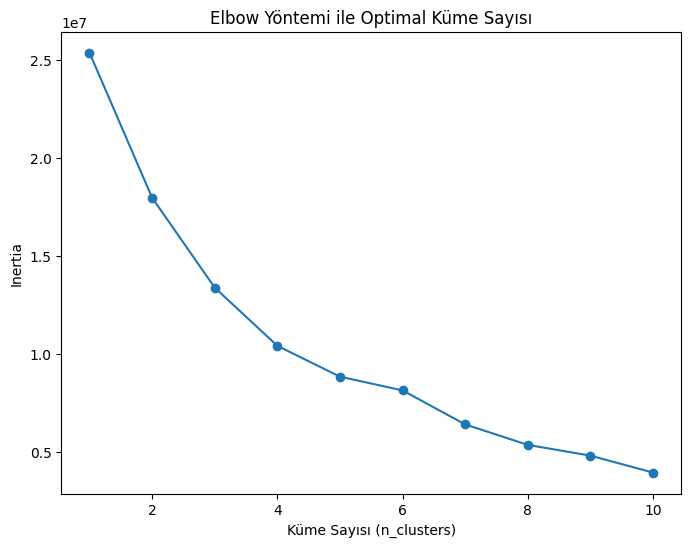

In [16]:
# 5.4. k-Ortalama (k-Means) İçin Hiperparametre Optimizasyonu
#Elbow Yöntemi
#Bu yöntemle, farklı n_clusters değerleri için k-means algoritmasını çalıştırıp, kümelerin içindeki hata karelerinin toplamını (inertia) gözlemledim.

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Farklı küme sayıları için k-means modeli oluşturdum ve inertia değerini hesaplattım.
inertia = []
cluster_range = range(1, 11)

for k in cluster_range:
    kmeans_model = KMeans(n_clusters=k, random_state=42)
    kmeans_model.fit(X_train)
    inertia.append(kmeans_model.inertia_)

# Inertia'yı grafikte gösterdim.
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, inertia, marker='o')
plt.xlabel('Küme Sayısı (n_clusters)')
plt.ylabel('Inertia')
plt.title('Elbow Yöntemi ile Optimal Küme Sayısı')
plt.show()




In [18]:
#Optimal Küme Sayısı ile k-Means Eğitimi
#Belirlediğim en uygun küme sayısıyla k-Means modelini yeniden eğittim.

# En iyi küme sayısı ile k-means modeli oluşturdum.
optimal_k = 5  
kmeans_model = KMeans(n_clusters=optimal_k, random_state=42)

# Modeli eğitim verisi üzerinde eğittim.
kmeans_model.fit(X_train)

# Kümeleri tahmin ettirdim.
clusters = kmeans_model.predict(X_test)

# Test setindeki kümeleri gösterdim.
print("Test setindeki kümeler:", clusters)

# Küme merkezlerini ekrana yazdırdım.
print("Küme Merkezleri:\n", kmeans_model.cluster_centers_)

Test setindeki kümeler: [3 3 3 ... 3 3 3]
Küme Merkezleri:
 [[18.78479102 -0.0374662  -0.24394651  3.83505486  7.60135743]
 [-0.0319747   3.80411004  3.80496697  0.15026511  0.06624262]
 [ 3.84485879  0.16567777  0.16960071 27.40540253 26.14982309]
 [-0.05853534 -0.19433222 -0.19420824 -0.15665436 -0.15293734]
 [ 0.58931655 -0.07467598 -0.07223552  2.57634258  2.48748354]]


In [19]:
#6.1. Lojistik Regresyon Modeli Değerlendirme

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Test setinde tahmin yaptırdım.
y_pred_log_reg = best_log_reg_model.predict(X_test)

# Doğruluk Skoru
accuracy = accuracy_score(y_test, y_pred_log_reg)
print(f"Lojistik Regresyon Doğruluk Skoru: {accuracy}")

# Karışıklık Matrisi
conf_matrix = confusion_matrix(y_test, y_pred_log_reg)
print("Karışıklık Matrisi:\n", conf_matrix)

# Sınıflandırma Raporu (Precision, Recall, F1 Score)
class_report = classification_report(y_test, y_pred_log_reg)
print("Sınıflandırma Raporu:\n", class_report)


Lojistik Regresyon Doğruluk Skoru: 0.9991693673360974
Karışıklık Matrisi:
 [[1270824      80]
 [    977     643]]
Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.89      0.40      0.55      1620

    accuracy                           1.00   1272524
   macro avg       0.94      0.70      0.77   1272524
weighted avg       1.00      1.00      1.00   1272524



In [25]:
# 6.2. k-Means Kümeleme Modeli Değerlendirme

from sklearn.metrics import silhouette_score

# Test setinde kümeleri tahmin ettirdim.
clusters = kmeans_model.predict(X_test)

# Kümeleme Performansı - Inertia (Kümeler içindeki hata miktarı)
inertia_value = kmeans_model.inertia_
print(f"K-Means Inertia Değeri: {inertia_value}")




K-Means Inertia Değeri: 17956081.890627444
